# Binary evolution towards formation of double compact object binaries

When evolving massive binaries in order to end up producing the merger between two compact objects due to the
loss of orbital energy due to the emission of gravitational radiation, there are several important phases that will highly change the evolution of the stars when compared to an isolated case.

An schematic view of the entire binary evolution of a progenitor (coming from the isolated binary evolution case
in which a common-envelope is needed to remove big fractions of orbital energy) can be as follows:

![BBH evolution](/home/asimazbunzel/Projects/J08408/reports/images/bbh_with_ce.png)

It is important to note some things about this evolution:

<div class="alert alert-info">
    <p style="font-size:20px;">1. There is a first mass-transfer phase, responsible for removing the envelope of the initially more massive star and also for accelerating the accretor due to the accretion not just of mass but also of angular momentum</p>
</div>

<div class="alert alert-success">
    <p style="font-size:20px;">2. During the collapse, sometimes asymmetries arise that imparts a momentum kick to the compact object and, thus, changing the orbital properties just after the kick: <strong>orbital period</strong>, <strong>eccentricity</strong>, <strong>inclination</strong>. This drives the system out of stability conditions that will try to be recover by the action of tides</p>
</div>

<div class="alert alert-warning">
    <p style="font-size:20px;">3. Just following the HMXB phase, the star will swell up enough such that another MT phsae starts, but this time it must be unstable such that a <strong>common-envelope</strong> is formed. The outcome of this phase should be a naked He core for the donor star and the compact object orbiting around in an extremely compact binary. If the star and the object are close enough, tides will also operate to reach syncronization and thus, a fast rotating naked star</p>
</div>

<div class="alert alert-danger">
    <p style="font-size:20px;">4. The collapse of the star, if tides were strong enough, can be the progenitor of a gamma-ray burst (GRB). This will leave a fast rotating neutron star or a black hole. In the case in which tides are not that important, the outcome will of course be different</p>
</div>
    
**<p style="font-size:20px;">All of these phases are subjected to several uncertainties, perhaps the most important ones come from the collapse stage and the common-envelope phase</p>**

# Dicotomy of populations of HMXB with BHs and BBH mergers ([Belczynski et al. 2020](https://ui.adsabs.harvard.edu/abs/2020A%26A...636A.104B/abstract))

Here goes a brief summary of Belc. 2018 paragraphs about inconsistancies in the measurements.

<div style="display:block; width:100%;">
    
  <div style="width:30%; float: left; display: inline-block;">
      <img src="/home/asimazbunzel/Projects/J08408/reports/images/xraybinary.jpg" alt="XRB" width="500" height="600">
  </div>
    
  <div style="width:70%; float: left; display: inline-block;">
      <div class="alert alert-info">
          <p style="font-size:20px;">The BHs detected by LVC are mostly massive and with small spins. For massive BHs ($M_{\rm BH} >$ 15 M$_\odot$) not many observational constraints have been found. The are only three BHs with spin and mass measurements and they are high spinning BHs ($a_{\rm spin} >$ 0.8)</p>

          <p style="font-size:20px;">To solve this tension it is proposed that they come from different evolutionary scenarios:</p>
          
          <p style="font-size:20px;">a) The three HMXBs with BHs might not  end up forming a BH-BH binary. Instead, either the star and the BH will merge during a mass-transfer phase or it will form a BH-NS system</p>

          <p style="font-size:20px;">b) The classical evolution towards BBH systems needs very wide binaries, in which case the spin-up due to tides will operate after a CE phase, when the WR and the BH are close to each other. Thus, only a few fraction of all the BBHs detected by LIGO will have a non-zero spin BH as a component. On the other hand, HMXB are thought to be formed from initial close binaries such that the evolve tidally locked, thus maintaining a high spin during their entire evolution</p>
      </div>
  </div>
    
  <div style="width:70%; float: left; display: inline-block;">
      <div class="alert alert-info">
          <p style="font-size:20px;">However, it seems like models are still in tension. More work surely is needed to tackle down this problem ! 🤓</p>
      </div>
  </div>
</div>



# The case of J08408-4503: an example of an asymmetric collapse ?

In this notebook we study the role that an asymmetric collapse followed by a momentum kick has on the progenitor
evolution of a known Supergiant fast X-ray transient (SFTX)

The binary parameters of J08408 for this study are found in the work of [Gamen et al. (2015)](https://ui.adsabs.harvard.edu/abs/2015A%26A...583L...4G/abstract). We aim to understand how evolution proceeds from the collapse and until the current measurements. In order to do so, we use [MESA](https://docs.mesastar.org/en/r15140/) for the detail evolution between the natal kick and up to the current state of the binary

Here we present the results on the core-collapse stage and how binary parameters are modified after it. In order to do so, we consider a random distribution for the kicks (strength and orientation) and we then apply the conservation of momentum to obtain a relation between pre and post collapse parameters as presented in [Kalogera 1996](https://ui.adsabs.harvard.edu/abs/1996ApJ...471..352K/abstract)

This is a simple scheme of how the binary is, and when and where outbursts are produced, adapted from [Ducci et al. (2019)](broken-link):

<div style="display:block; width:100%;">
    
  <div style="width:50%; float: left; display: inline-block;">
      <p class="aligncenter">
      <img src="/home/asimazbunzel/Projects/J08408/reports/images/ducci2019summary.png" alt="J08408" width="700" height="600">
      </p>
  </div>
    
  <div style="width:50%; float: left; display: inline-block;">
      <br><br><br><br>
      <div class="alert alert-info">
          <p style="font-size:20px;"><strong>Stellar parameters</strong>:</p>
          <ul>
              <li><p style="font-size:20px;">Optical companion: > 30 M$_\odot$</p></li>
              <li><p style="font-size:20px;">Compact object: ~ 1.6 M$_\odot$</p></li>
              <li><p style="font-size:20px;">Orbital period: ~ 9.5 d</p></li>
              <li><p style="font-size:20px;">eccentricity: ~ 0.63</p></li>
          </ul>
      </div>
  </div>
</div>

## Configuration

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.optimize import bisect

import poskiorb as pk

# some constants
one_third = 1e0/3e0
pi = 3.1415926535897932384626433832795028841971693993751e0
standard_cgrav = 6.67428e-8
Msun = 1.9892e33
Rsun = 6.9598e10
Hubble_time = 13.461701658024014e0  # Gyr
clight = 2.99792458e10
secyer = 3.1558149984e7

In [2]:
def a_to_P(separation, m1, m2):
    """Kepler law to go from separation to orbital period
    
    Parameters
    ----------
    a: binary separation in [Rsun]
    m1: mass of primary star in [Msun]
    m2: mass of secondary star in [Msun]

    Returns
    -------
    period: orbital period in [days]
    """
    separation = separation * Rsun  # in cm
    m1 = m1 * Msun
    m2 = m2 * Msun   # in g

    period = 2 * np.pi * np.sqrt(separation**3/(standard_cgrav*(m1+m2)))/(86400.0)
    return period

def P_to_a(period, m1, m2):
    """
    Binary separation from known period

    Parameters
    ----------
    P: binary period in [days]
    M1: mass of primary star in [Msun]
    M2: mass of secondary star in [Msun]

    Returns
    -------
    a: binary separation in [Rsun]
    """
    period = period * 24e0 * 3600e0  # in sec
    m1 = m1 * Msun; m2 = m2 * Msun   # in g
    tmp = standard_cgrav * (m1 + m2) * (period/(2*np.pi)) ** 2
    separation = np.power(tmp, one_third)
    return separation/Rsun

def rlobe(m1, m2, separation):
    """Roche lobe approximation for a star using Eggleton (1983)
    formula

    Parameters
    ----------
    m1: mass of primary star in [Msun]
    m2: mass of secondary star in [Msun]
    separation: binary separation in [Rsun]

    Returns
    -------
    RL: Roche lobe of primary star in [Rsun]
    """
    one_third = 1e0/3e0
    q = np.power(m1/m2, one_third)
    RL = 0.49e0 * q**2 / (0.6 * q**2 + np.log(1+q))
    RL = separation * RL

    return RL

## Conditions at core-collapse

These conditions were obtained from a detailed simulation between two non-degenerate stars of initial masses of 26 and 23 M$_\odot$, in a circular orbit with a period of 3 days. Both stars are born with a rotation rate that is equal to the orbital period, thus initial syncronization is assumed. Additionally, the stars present a solar metallicity content.

<div style="display:block; width:100%;">
    
  <div style="width:50%; float: left; display: inline-block;">
      <p class="aligncenter">
          <img src="/home/asimazbunzel/Projects/J08408/reports/images/hr.png" />
      </p>
  </div>
   
  <div style="width:50%; float: left; display: inline-block;">
      
      <br><br><br><br><br><br>
      
      <p>The evolution previous to the core-collapse is as follows:</p>
      <ul>
          <li>An initial mass-transfer (MT) phase when the donor (initially more massive star of 30 M$_\odot$) is burning H in its core, i.e., Case A of MT. During this phase some XX M$_\odot$ are transferred to the accretor star, which after accreting YY M$_\odot$ is now the more massive of the pair. Due to the accretion of angular momentum, that is modelled as a Keplerian disk, the accretor reach its critical rotation rate after which accretion is supressed, removing the material that is not accreted with the specific angular momentum of the accretor star. After ZZ years, the donor star which has lost a big fraction of its outer shells due to MT, contracts just before the end of its MS evolution thus finalizing a first MT episode. By this time, the accretor has rejuvenated its inner H-rich core, moving its position in the HR diagram to higher luminosities</li>
          
          <li>After the initially more massive star leaves the MS, it starts a rapid evolution where it swells up enough to start a second MT phase before igniting the He in its core, i.e., early Case B of MT begins. This phase is much faster than the previous Case episode, removing almost the entire H-rich light envelope of the donor. Due to the fast timescale, the companion cannot accrete the entire of this transferred mass as it is very close to critical rotation. Most of this mass is then lost, changing mainly the orbital parameters (separation/orbital period). This short periods has a timescale similar to the thermal timescale of the donor star.</li>
          
          <li>Once the initially more massive star is removed from its entire H-rich envelope, it contracts and starts travelling to the hotter parts in the HR diagram, becoming a so-called WR star. In this phase, very strong winds are responsible for the removal of its outer parts, meanwhile in the core the stars is burning the He in its core, and perhaps, a little bit of H (if any is present). This phase can last some fractions of a million years.</li>
          
          <li>The depletion of He in the core of the initially more massive star is then followed by the burning in a thin shell of He. This is then accompanied by the burning of heavier elements in the core of the star. The evolution is accelerated at this point due to neutrino losses. Only some thousands of years later the star will reach the core-collapse stage. It is important to note that binary parameters will not vary much during this time, so it's common to find in the literature that binary evolution is stopped at the core C burning phase, assuming the properties of the binary will not change until core-collapse.</li>
          
          <li>Once the C burning phase ends, the collapse of the star produces a neutron star (NS) of 1.5 M$_\odot$. The companion star is, at this point, a massive star of around 31 M$_\odot$ that is burning H in its core. The orbital period is around 10 days.</li>
      </ul>
  </div>
</div>

In [3]:
binary = pk.binary.BinarySystem(
    m1=9, m1_core_mass=5, m1_remnant_mass=1.5, m1_fallback_fraction=0.1, 
    m2=31,
    P=10
)

# also needed is the radius of the secondary star
R2 = 10  # in Rsuns

## Momentum kick (natal kick)

Here we present the assumptions we define for the collapse stage. These are obtained from other works in which
observations were used to derived statistical distributions for the asymmetric collapse stage.

Given that the natal kick is just a velocity imparted to the compact object remnant of the collapse, it needs to
be defined in terms of its strength and direction on the space. We label as $w$ to the strength of the kick while $\theta$ and $\phi$ to directions.

We consider a Maxwellian distribution for $w$ that is isotropically directed in space. In addition to this, we assume that the strength is reduced by the fraction that fallsback to the proto NS

In [4]:
binary.set_natal_kick_distribution(
    n_trials=50000,
    distribution_id='Maxwell',
    kick_scaling=lambda x: (1-binary.m1_fallback_fraction)*x
)

# compute the asymmetric kicks
binary.get_natal_kick_distribution()

# computer post kick orbital parameters
binary.get_orbital_distribution(verbose=True)

calculating post core-collapse orbits for 50000 kicks
	19662 binaries remain bounded (39.32 percent)
	30338 binaries become unbounded (60.68 percent)


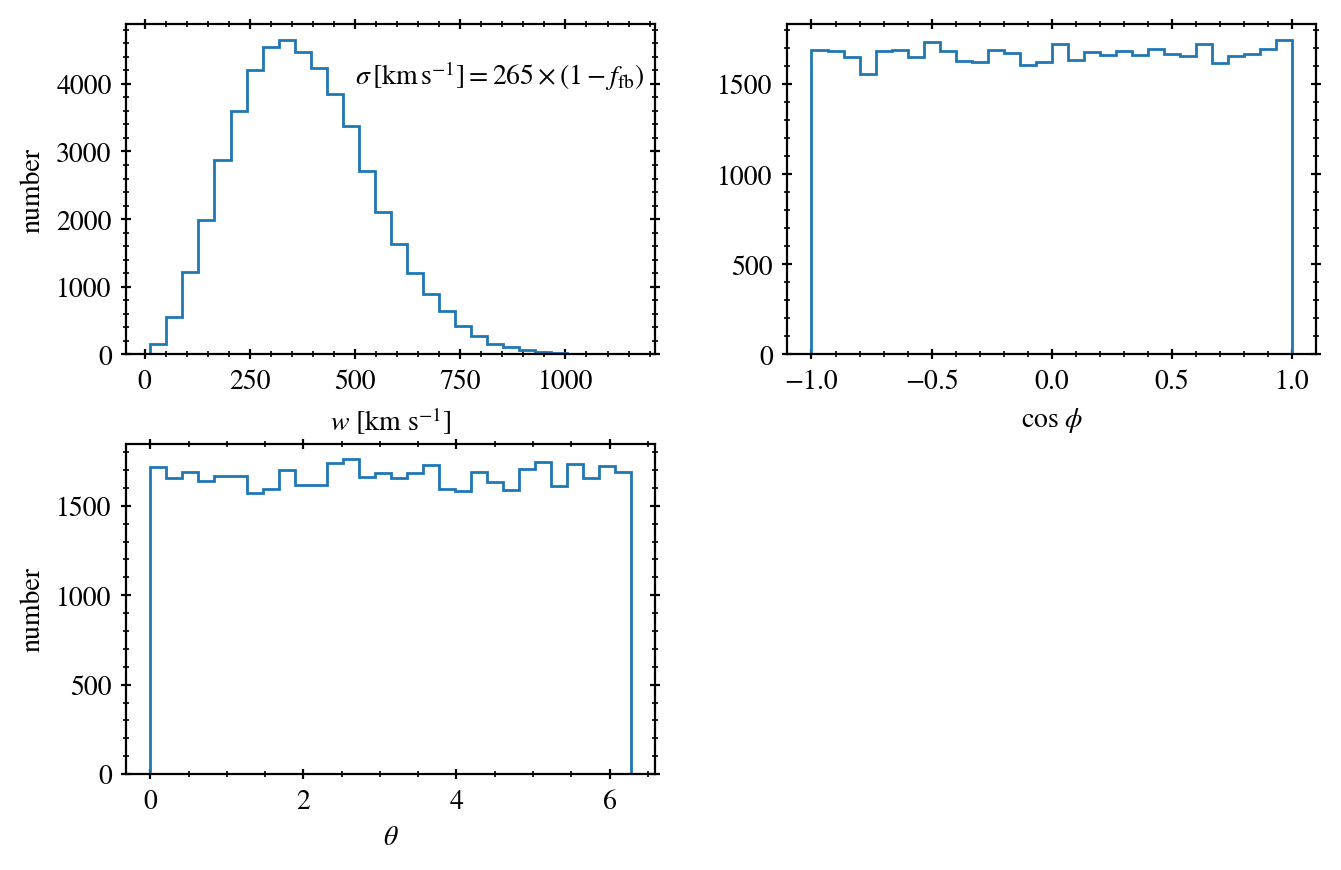

In [5]:
plt.style.use('../config/style.mpl')
fig = plt.figure(figsize=(7,5))
gs = gridspec.GridSpec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax1.set_xlabel('$w$ [km s$^{-1}$]')
ax2.set_xlabel('$\\cos\,\\phi$')
ax3.set_xlabel('$\\theta$')
ax1.set_ylabel('number')
ax3.set_ylabel('number')

# number of bins (only for the plot)
nbins = 30

# distribution
ax1.hist(binary.w, bins=nbins, histtype='step', color='C0');
ax2.hist(np.cos(binary.theta), bins=nbins, histtype='step', color='C0');
ax3.hist(binary.phi, bins=nbins, histtype='step', color='C0');

ax1.annotate('$\\sigma \\, [{\\rm km}\\,{\\rm s}^{-1}] = 265 \\times (1 - f_{\\rm fb})$', xy=(500, 4000))

# plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.27, left=0.05, top=0.9, bottom=0.15);

## Orbital parameter distributions after asymmetric core collapse

With the equations of momentum, the derivation of orbital parameters is easily done. This
conservation implies that certain regions of the space are forbbiden, thus no binaries can
be found in those locations

In this region, one can also derived lines of constant values for the kick, as we will
show later

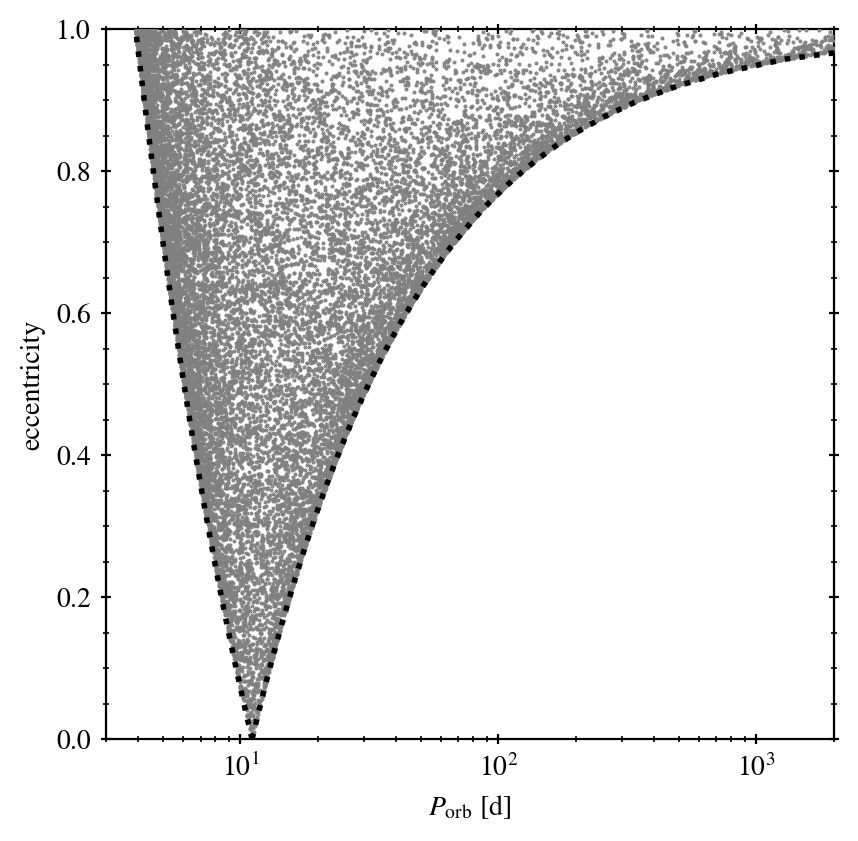

In [6]:
plt.style.use('../config/style.mpl')
fig, ax = plt.subplots(figsize=(4.7,4.7))
ax.set_xscale('log')

# theoretical limits
ecc_max = 0.999
ecs = np.linspace(0, ecc_max)
ax.plot(
    a_to_P(binary.a/(1+ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
)
ax.plot(
    a_to_P(binary.a/(1-ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
);

binary.plot_post_kick_orbital_configurations(
    xattr:='P',
    yattr='e',
    fig=fig,
    ax=ax,
    xlim=[3,2e3],
    ylim=[0,1],
    s=0.2,
    zorder=9,
    color='gray',
);

## Interesting features in this diagram

One interesting thing hidden in this plane is the relation with different constant values such as: $w$, radius of
the Roche lobe (RL, [Eggleton 1983](https://ui.adsabs.harvard.edu/abs/1983ApJ...268..368E/abstract))

<div class="alert alert-success">
    <p style="font-size:20px;" class="aligncenter">The radius of the Roche lobe is simply a function of: <strong>mass-ratio</strong> and the <strong>separation</strong>:</p>
    $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad R_{\rm RL} = \frac{0.49 q^{2/3}}{0.6 q^{2/3} + \ln(1 + q^{1/3})} \times a$
</div>

<div class="alert alert-success">
    <p style="font-size:20px;" class="aligncenter">With the <strong>orbital period</strong> and using <strong>Kepler's law</strong>, the separation is easily obtained</p>
</div>

Here we show them:

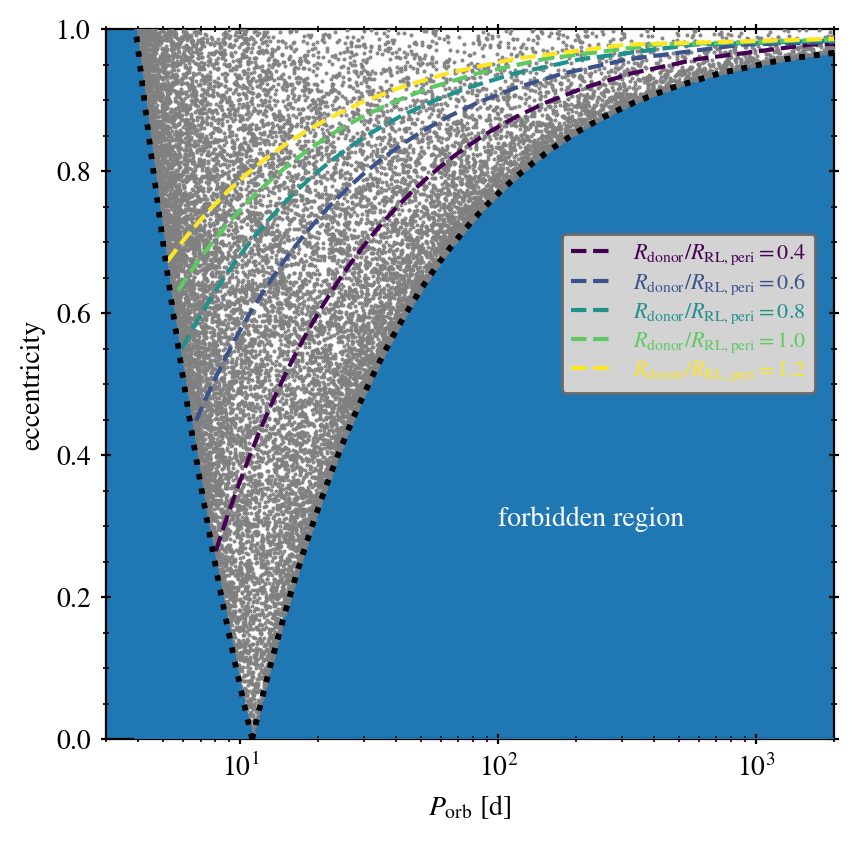

In [7]:
plt.style.use('../config/style.mpl')
fig, ax = plt.subplots(figsize=(4.7,4.7))
ax.set_xscale('log')

# theoretical limits
ecc_max = 0.999
ecs = np.linspace(0, ecc_max)
ax.plot(
    a_to_P(binary.a/(1+ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
)
ax.plot(
    a_to_P(binary.a/(1-ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
);

# constant lines of RLOF
R_div_RL = [0.4, 0.6, 0.8, 1.0, 1.2]
colors = plt.cm.viridis(np.linspace(0,1,len(R_div_RL)))
for k,ratio in enumerate(R_div_RL):
    a_for_R_div_RL = np.zeros(len(ecs))
    a = np.logspace(-1,4)
    for i,e in enumerate(ecs):
        f = lambda a: R2 / rlobe(binary.m2, binary.m1_remnant_mass, a * (1 - e)) - ratio
        a_for_R_div_RL[i] = bisect(f, a=0, b=1e6, maxiter=100)
    
    mask = a_for_R_div_RL > binary.a / (1 + ecs)
    ax.plot(
        a_to_P(a_for_R_div_RL[mask], binary.m2, binary.m1_remnant_mass), ecs[mask],
        c=colors[k], ls='--', alpha=1, zorder=99,
        label='$R_{}/R_{} = {}$'.format('{\\rm donor}', '{\\rm RL,peri}', ratio))
leg = ax.legend(fancybox=True, frameon=True, facecolor='lightgray', edgecolor='dimgray', framealpha=1.0,
           loc='center', ncol=1, bbox_to_anchor=(0.8,0.6), bbox_transform=ax.transAxes);
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    
# a = a_pre / (1 + e)
# => e = 1 - (a_pre / a)
porbs = np.logspace(np.log10(np.min(binary.P_post)), np.log10(np.max(binary.P_post)))
ecss = np.zeros(len(porbs))
for k,p in enumerate(porbs):
    a = P_to_a(p, binary.m2, binary.m1_remnant_mass)
    ecss[k] = 1 - binary.a / a

ax.fill_between(porbs, 0, ecss, color='C0')

# a = a_pre / (1 - e)
# => e = -1 + (a_pre / a)
porbs = np.logspace(np.log10(np.min(binary.P_post)), np.log10(np.max(binary.P_post)))
ecss = np.zeros(len(porbs))
for k,p in enumerate(porbs):
    a = P_to_a(p, binary.m2, binary.m1_remnant_mass)
    ecss[k] = - 1 + binary.a / a

ax.fill_between(porbs, 0, ecss, color='C0', zorder=99)
ax.fill_between(np.linspace(0,3.89), 0, 1.01, color='C0')

# theoretical limits
ecc_max = 0.999
ecs = np.linspace(0, ecc_max)
ax.plot(
    a_to_P(binary.a/(1+ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
)
ax.plot(
    a_to_P(binary.a/(1-ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
);

ax.annotate('forbidden region', xy=(100,0.3), color='white');

binary.plot_post_kick_orbital_configurations(
    xattr:='P',
    yattr='e',
    fig=fig,
    ax=ax,
    xlim=[3,2e3],
    ylim=[0,1],
    s=0.2,
    zorder=9,
    color='gray',
);

<div class="alert alert-info">
    <p style="font-size:20px;">Forbidden regions (blue) are a consequence of the conservation of linear momentum. More info can be found in Kalogera 1996 and Kalogera 2000</p>
</div>

Using the lines of constant ratio between the non degenerate star to its associated Roche Lobe, we can remove from
our grid exploration all those binaries which, just after the collapse, becomes an interacting binary with matter
being transferred to the NS, as these cases will unavoidably form a common-envelope phase which is hard to remove
given the really high mass of the star

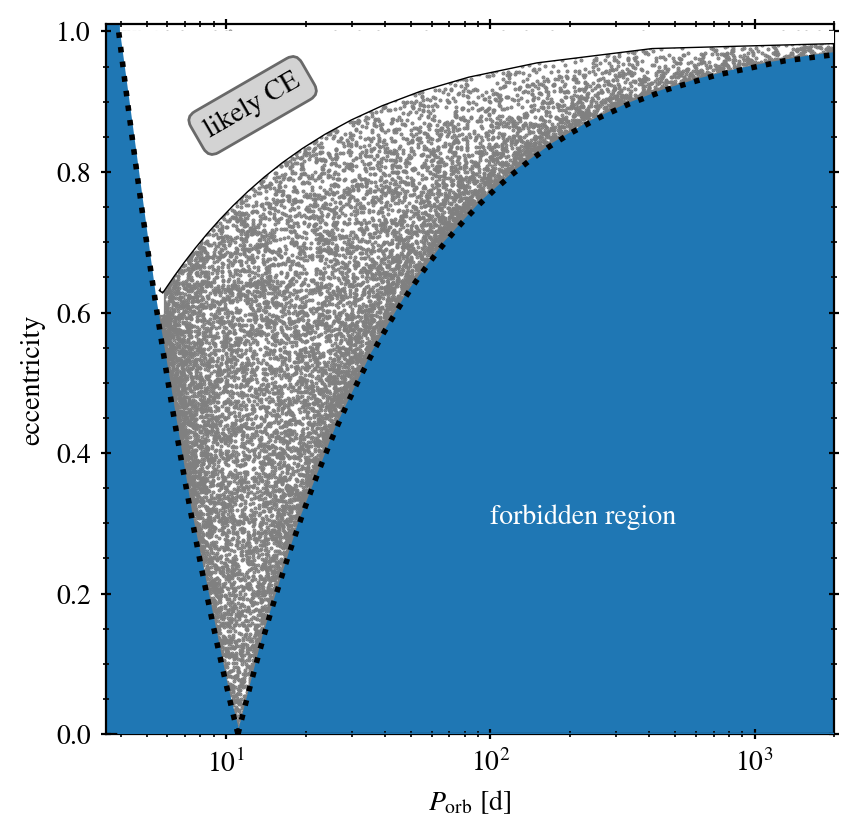

In [8]:
plt.style.use('../config/style.mpl')
fig, ax = plt.subplots(figsize=(4.7,4.7))

# avoid showing binaries with R > RL (RLOF just after collapse) due to CE formation
ecc_max = 0.999
ecs = np.linspace(0, ecc_max)
a_for_R_div_RL = np.zeros(len(ecs))
P_for_R_div_RL_1e0 = np.zeros(len(ecs))
a = np.logspace(-1,4)
for i,e in enumerate(ecs):
    f = lambda a: R2 / rlobe(binary.m2, binary.m1_remnant_mass, a * (1 - e)) - 1.0
    a_for_R_div_RL[i] = bisect(f, a=0, b=1e6, maxiter=100)
    P_for_R_div_RL_1e0[i] = a_to_P(bisect(f, a=0, b=1e6, maxiter=100), binary.m2, binary.m1_remnant_mass)

mask = a_for_R_div_RL > binary.a / (1 + ecs)
P_for_R_div_RL_1e0 = P_for_R_div_RL_1e0[mask]
ecs = ecs[mask]

ax.plot(P_for_R_div_RL_1e0, ecs, color='black', lw=2)

ax.scatter(binary.P_post, binary.e_post, c='gray', s=0.2, zorder=1)

ax.fill_between(P_for_R_div_RL_1e0, ecs, 0.999,
                zorder=98, color='white')
ax.fill_between([ax.get_xlim()[0]+0.1, np.min(P_for_R_div_RL_1e0)],0.6,1,
                color='white');

ax.annotate('likely CE', xy=(8, 0.85), zorder=99, rotation=30,
           bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'
                    )
           );

# a = a_pre / (1 + e)
# => e = 1 - (a_pre / a)
porbs = np.logspace(np.log10(np.min(binary.P_post)), np.log10(np.max(binary.P_post)))
ecss = np.zeros(len(porbs))
for k,p in enumerate(porbs):
    a = P_to_a(p, binary.m2, binary.m1_remnant_mass)
    ecss[k] = 1 - binary.a / a

ax.fill_between(porbs, 0, ecss, color='C0')

# a = a_pre / (1 - e)
# => e = -1 + (a_pre / a)
porbs = np.logspace(np.log10(np.min(binary.P_post)), np.log10(np.max(binary.P_post)))
ecss = np.zeros(len(porbs))
for k,p in enumerate(porbs):
    a = P_to_a(p, binary.m2, binary.m1_remnant_mass)
    ecss[k] = - 1 + binary.a / a

ax.fill_between(porbs, 0, ecss, color='C0', zorder=99)
ax.fill_between(np.linspace(0,3.89), 0, 1.01, color='C0')

# theoretical limits
ecc_max = 0.999
ecs = np.linspace(0, ecc_max)
ax.plot(
    a_to_P(binary.a/(1+ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
)
ax.plot(
    a_to_P(binary.a/(1-ecs), binary.m2, binary.m1_remnant_mass), ecs,
    ls=':', c='black', zorder=99, lw=2,
);

ax.annotate('forbidden region', xy=(100,0.3), color='white');

ax.set_xscale('log')
ax.set_xlim([3.5, 2e3])
ax.set_ylim([0,1.01])

ax.set_xlabel('$P_{\\rm orb}$ [d]')
ax.set_ylabel('eccentricity');